<a href="https://colab.research.google.com/github/hanagueddari/diabete-prediction/blob/main/diabet_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
import numpy as np


from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, mean_squared_error, classification_report, confusion_matrix
from mlxtend.plotting import plot_confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC


In [ ]:
chemin_fichier = '/content/diabetes_binary_health_indicators_BRFSS2015.csv'
data= pd.read_csv(chemin_fichier)
pd.set_option('display.max_columns', None)
data

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
253675,0.0,1.0,1.0,1.0,45.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,3.0,0.0,5.0,0.0,1.0,5.0,6.0,7.0
253676,1.0,1.0,1.0,1.0,18.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,4.0,0.0,0.0,1.0,0.0,11.0,2.0,4.0
253677,0.0,0.0,0.0,1.0,28.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,2.0,5.0,2.0
253678,0.0,1.0,0.0,1.0,23.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,3.0,0.0,0.0,0.0,1.0,7.0,5.0,1.0


## Exploration des données

In [ ]:
data.shape

(253680, 22)

In [ ]:
data["Diabetes_binary"].value_counts()

0.0    218334
1.0     35346
Name: Diabetes_binary, dtype: int64

In [ ]:
data.columns

Index(['Diabetes_binary', 'HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker',
       'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
       'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education',
       'Income'],
      dtype='object')

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Diabetes_binary       253680 non-null  float64
 1   HighBP                253680 non-null  float64
 2   HighChol              253680 non-null  float64
 3   CholCheck             253680 non-null  float64
 4   BMI                   253680 non-null  float64
 5   Smoker                253680 non-null  float64
 6   Stroke                253680 non-null  float64
 7   HeartDiseaseorAttack  253680 non-null  float64
 8   PhysActivity          253680 non-null  float64
 9   Fruits                253680 non-null  float64
 10  Veggies               253680 non-null  float64
 11  HvyAlcoholConsump     253680 non-null  float64
 12  AnyHealthcare         253680 non-null  float64
 13  NoDocbcCost           253680 non-null  float64
 14  GenHlth               253680 non-null  float64
 15  

In [ ]:
data.head()

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


In [ ]:
data.describe()

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
count,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,...,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000
mean,0.139333,0.429001,0.424121,0.962670,28.382364,0.443169,0.040571,0.094186,0.756544,0.634256,...,0.951053,0.084177,2.511392,3.184772,4.242081,0.168224,0.440342,8.032119,5.050434,6.053875
std,0.346294,0.494934,0.494210,0.189571,6.608694,0.496761,0.197294,0.292087,0.429169,0.481639,...,0.215759,0.277654,1.068477,7.412847,8.717951,0.374066,0.496429,3.054220,0.985774,2.071148
min,0.000000,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,1.000000,24.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,6.000000,4.000000,5.000000
50%,0.000000,0.000000,0.000000,1.000000,27.000000,0.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,8.000000,5.000000,7.000000
75%,0.000000,1.000000,1.000000,1.000000,31.000000,1.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,3.000000,2.000000,3.000000,0.000000,1.000000,10.000000,6.000000,8.000000
max,1.000000,1.000000,1.000000,1.000000,98.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,5.000000,30.000000,30.000000,1.000000,1.000000,13.000000,6.000000,8.000000


## Traitement de données


In [ ]:
data["Diabetes_binary"] = data["Diabetes_binary"].astype(int)
data["HighBP"] = data["HighBP"].astype(int)
data["HighChol"] = data["HighChol"].astype(int)
data["CholCheck"] = data["CholCheck"].astype(int)
data["BMI"] = data["BMI"].astype(int)
data["Smoker"] = data["Smoker"].astype(int)
data["Stroke"] = data["Stroke"].astype(int)
data["HeartDiseaseorAttack"] = data["HeartDiseaseorAttack"].astype(int)
data["PhysActivity"] = data["PhysActivity"].astype(int)
data["Fruits"] = data["Fruits"].astype(int)
data["Veggies"] = data["Veggies"].astype(int)
data["HvyAlcoholConsump"] = data["HvyAlcoholConsump"].astype(int)
data["AnyHealthcare"] = data["AnyHealthcare"].astype(int)
data["NoDocbcCost"] = data["NoDocbcCost"].astype(int)
data["GenHlth"] = data["GenHlth"].astype(int)
data["MentHlth"] = data["MentHlth"].astype(int)
data["PhysHlth"] = data["PhysHlth"].astype(int)
data["DiffWalk"] = data["DiffWalk"].astype(int)
data["Sex"] = data["Sex"].astype(int)
data["Age"] = data["Age"].astype(int)
data["Education"] = data["Education"].astype(int)
data["Income"] =data["Income"].astype(int)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype
---  ------                --------------   -----
 0   Diabetes_binary       253680 non-null  int64
 1   HighBP                253680 non-null  int64
 2   HighChol              253680 non-null  int64
 3   CholCheck             253680 non-null  int64
 4   BMI                   253680 non-null  int64
 5   Smoker                253680 non-null  int64
 6   Stroke                253680 non-null  int64
 7   HeartDiseaseorAttack  253680 non-null  int64
 8   PhysActivity          253680 non-null  int64
 9   Fruits                253680 non-null  int64
 10  Veggies               253680 non-null  int64
 11  HvyAlcoholConsump     253680 non-null  int64
 12  AnyHealthcare         253680 non-null  int64
 13  NoDocbcCost           253680 non-null  int64
 14  GenHlth               253680 non-null  int64
 15  MentHlth              253680 non-n

vérifier les valeurs nulles

In [ ]:
data.isnull().sum()

Diabetes_binary         0
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
dtype: int64

check unique values in different variables

In [ ]:
unique_values = {}
for col in data.columns:
    unique_values[col] = data[col].value_counts().shape[0]

pd.DataFrame(unique_values, index=['unique value count']).transpose()

,unique value count
Diabetes_binary,2
HighBP,2
HighChol,2
CholCheck,2
BMI,84
Smoker,2
Stroke,2
HeartDiseaseorAttack,2
PhysActivity,2
Fruits,2


Check and drop dublicated data

In [ ]:
data.duplicated().sum()

24206

In [ ]:
data.drop_duplicates(inplace = True)

In [ ]:
data.duplicated().sum()

0

In [ ]:
data.shape

(229474, 22)

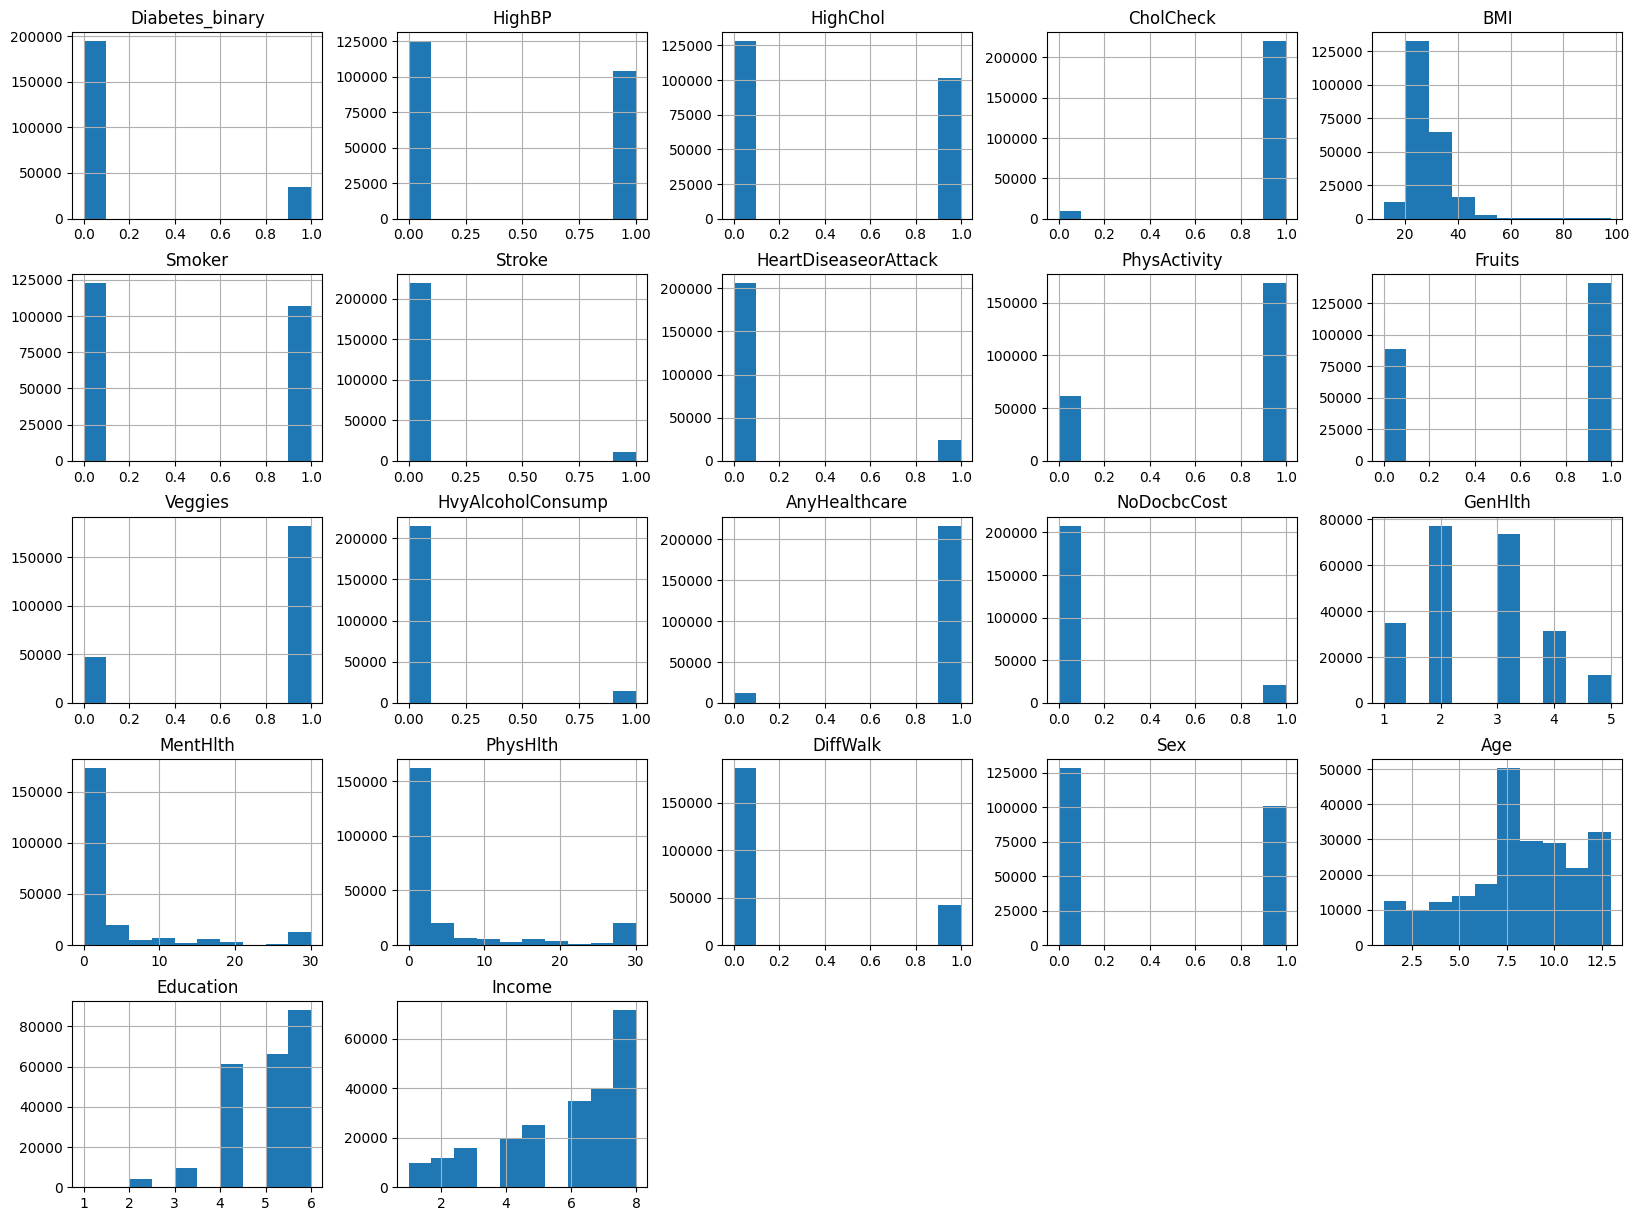

In [ ]:
#using histogram to understand dataset data better

data.hist(figsize=(20,15));

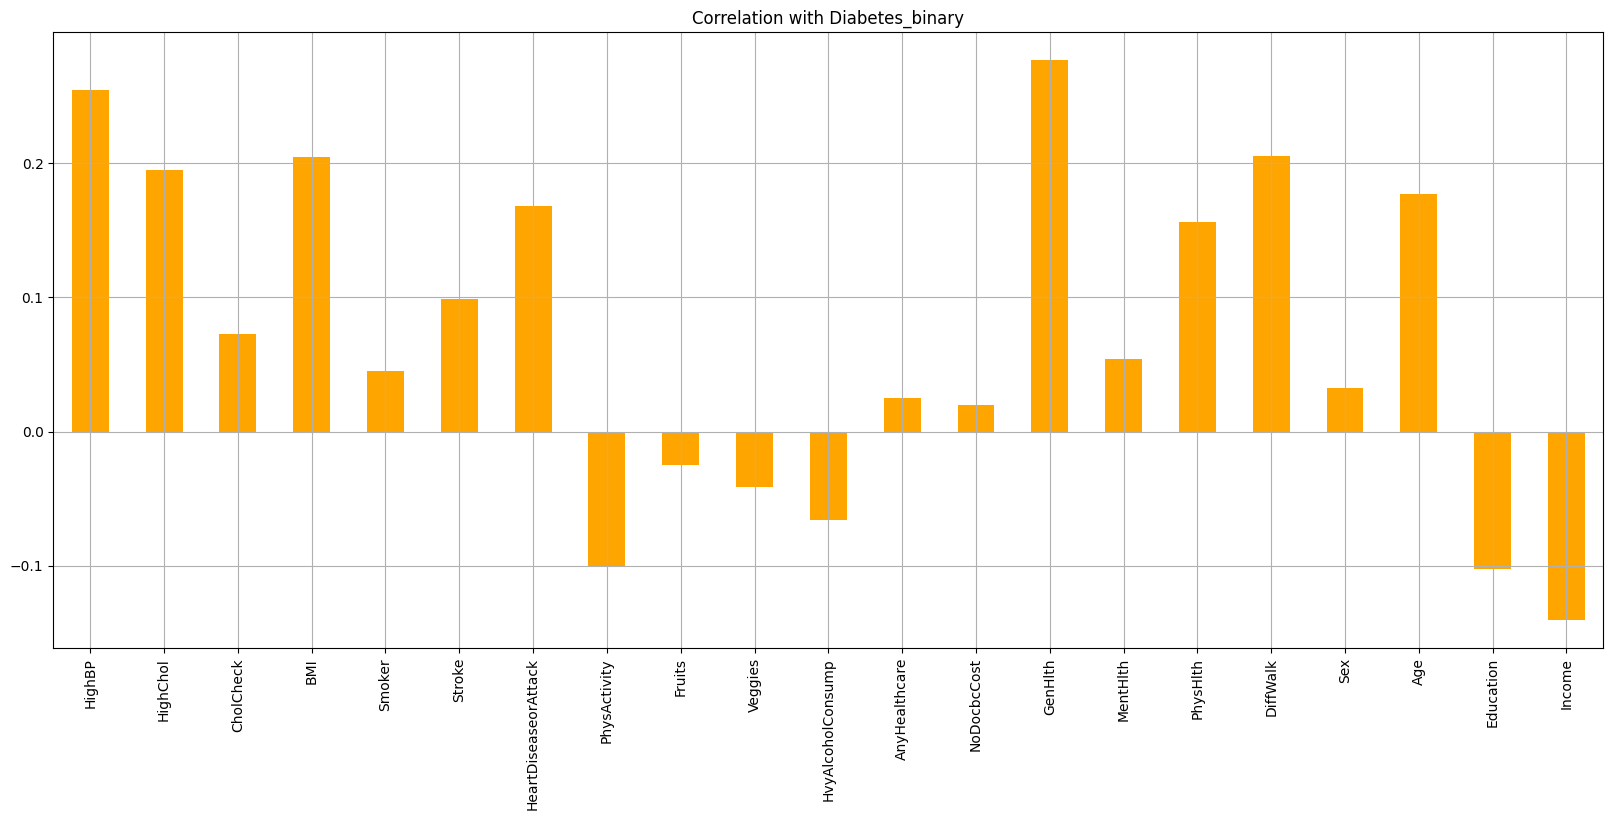

In [ ]:
data.drop('Diabetes_binary', axis=1).corrwith(data.Diabetes_binary).plot(kind='bar', grid=True, figsize=(20, 8)
, title="Correlation with Diabetes_binary",color="Orange");

graphe de correlation entre les caractéristiques et la cible "Diabetes_binary"

Fruits , AnyHealthcare , NoDocbccost et sex ont un efaible corrélation avec Diabetes_binary.

HighBP , HighChol , BMI , smoker , stroke , HeartDiseaseorAttack , PhysActivity , Veggies , MentHlth , HvyAlcoholconsump , GenHlth , PhysHlth , Age , Education , Income et DiffWalk ont une forte corrélation avec Diabetes_binary.

Nous utiliserons ces fonctionnalités dans notre modèle

"Fruits" , "Veggies" , "Sex" , "CholCheck" , " AnyHealthcare" ne seront pas avec nous

Let's view our target values "Daibetes_binary"

In [ ]:
colomns = ["Fruits" , "Veggies" , "Sex" , "CholCheck" , "AnyHealthcare" ]
data.drop(colomns , axis= 1 ,inplace=True)

In [ ]:
data["Diabetes_binary"].value_counts()

0    194377
1     35097
Name: Diabetes_binary, dtype: int64

In [ ]:
data.shape

(229474, 17)

In [ ]:
data

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
253675,0.0,1.0,1.0,1.0,45.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,3.0,0.0,5.0,0.0,1.0,5.0,6.0,7.0
253676,1.0,1.0,1.0,1.0,18.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,4.0,0.0,0.0,1.0,0.0,11.0,2.0,4.0
253677,0.0,0.0,0.0,1.0,28.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,2.0,5.0,2.0
253678,0.0,1.0,0.0,1.0,23.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,3.0,0.0,0.0,0.0,1.0,7.0,5.0,1.0


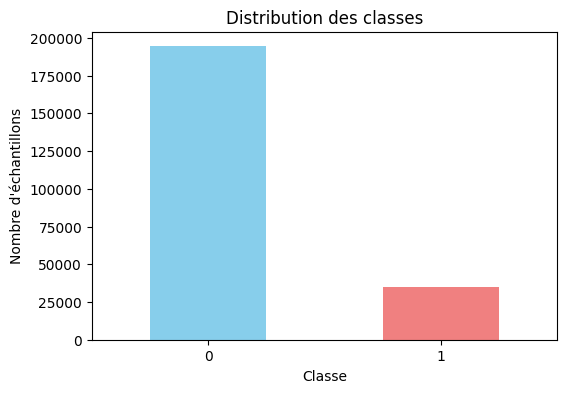

In [ ]:
import matplotlib.pyplot as plt

# Compter le nombre de diabétiques et non diabétiques
counts = data['Diabetes_binary'].value_counts()

# Créer un diagramme à barres
plt.figure(figsize=(6, 4))
counts.plot(kind='bar', color=['skyblue', 'lightcoral'])
plt.title('Distribution des classes')
plt.xlabel('Classe')
plt.ylabel("Nombre d'échantillons")
plt.xticks(rotation=0)
plt.show()



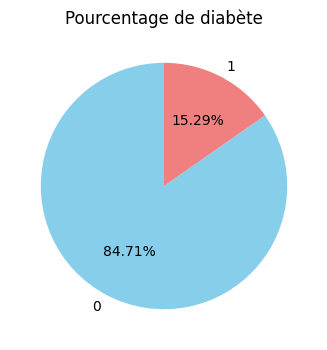

In [ ]:
import matplotlib.pyplot as plt



# Définir les couleurs
colors = ['skyblue', 'lightcoral']

# Créer un diagramme circulaire
plt.figure(figsize=(8, 4))
plt.pie(counts, labels=['0', '1'], autopct='%1.2f%%',startangle=90, colors=colors)
plt.title('Pourcentage de diabète')
plt.show()


nous somme dans le cas de classes déséquilbrés

# Data splitting

In [ ]:
X=data.drop("Diabetes_binary",axis=1)
Y=data["Diabetes_binary"]

# Dealing with imbalancing

In [ ]:
Y.value_counts()

0    194377
1     35097
Name: Diabetes_binary, dtype: int64

In [ ]:
from imblearn.under_sampling import NearMiss
nm = NearMiss(version = 1 , n_neighbors = 10)

x_sm,y_sm= nm.fit_resample(X,Y)

In [ ]:
y_sm.shape , x_sm.shape

((70194,), (70194, 16))

In [ ]:
y_sm.value_counts()

0    35097
1    35097
Name: Diabetes_binary, dtype: int64

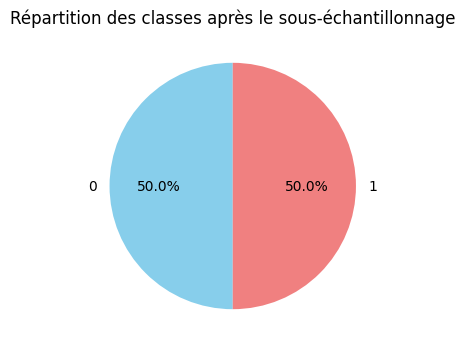

In [ ]:
# Compter les occurrences de chaque classe après le sous-échantillonnage
counts_after = pd.Series(y_sm).value_counts()

# Créer un diagramme circulaire
# Définir les couleurs
plt.figure(figsize=(8, 4))
colors = ['skyblue', 'lightcoral']
plt.pie(counts_after, labels=counts_after.index, autopct='%1.1f%%', startangle=90, colors=colors)
plt.title('Répartition des classes après le sous-échantillonnage')
plt.show()

# Data splitting

In [ ]:
X_train , X_test , Y_train , Y_test = train_test_split(x_sm,y_sm, test_size=0.3 , random_state=42)

Data Scalling

In [ ]:
scalar = StandardScaler()
X_train = scalar.fit_transform(X_train)
X_test = scalar.fit_transform(X_test)

## Modeling

# Decision Tree

In [ ]:
# Créer et entraîner le modèle Decision Tree
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, Y_train)

DecisionTreeClassifier(random_state=42)

In [ ]:
# Faire des prédictions sur l'ensemble de test
Y_pred = model.predict(X_test)

In [ ]:
# Calculer l'accuracy
accuracy = accuracy_score(Y_test, Y_pred)
print(f'Accuracy: {accuracy}')

# Calculer l'erreur MSE
mse = mean_squared_error(Y_test, Y_pred)
print(f'Mean Squared Error (MSE): {mse}')

# Calculer l'erreur RMSE
rmse = np.sqrt(mse)
print(f'Root Mean Squared Error (RMSE): {rmse}')

# Afficher le classification report
print('Classification Report:\n', classification_report(Y_test, Y_pred))


Accuracy: 0.8084429460088324
Mean Squared Error (MSE): 0.19155705399116768
Root Mean Squared Error (RMSE): 0.437672313484835
Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.84      0.81     10468
           1       0.83      0.77      0.80     10591

    accuracy                           0.81     21059
   macro avg       0.81      0.81      0.81     21059
weighted avg       0.81      0.81      0.81     21059



In [ ]:
#Calculer la matrice de confusion
conf_matrix_logistic = confusion_matrix(Y_test, Y_pred)
conf_matrix_logistic

array([[8837, 1631],
       [2403, 8188]])

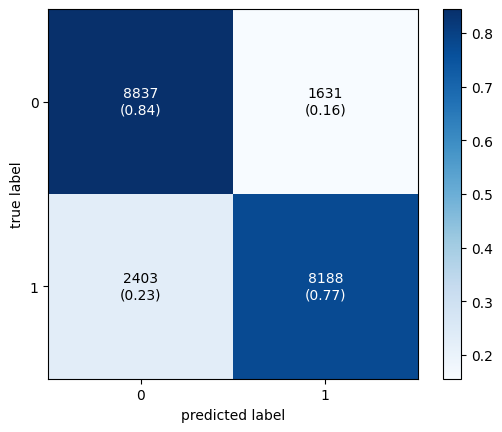

In [ ]:
# Créer une matrice de confusion pour la régression logistique
cm1 = confusion_matrix(Y_test,Y_pred)
plot_confusion_matrix(conf_mat=cm1,show_absolute=True,
                                show_normed=True,
                                colorbar=True)
plt.show()

# Logistic Regressing

In [ ]:
# Créer et entraîner le modèle de régression logistique
logistic_model = LogisticRegression(random_state=42)
logistic_model.fit(X_train, Y_train)

# Faire des prédictions sur l'ensemble de test
Y_pred_logistic = logistic_model.predict(X_test)

# Calculer l'accuracy
accuracy_logistic = accuracy_score(Y_test, Y_pred_logistic)
print(f'Accuracy (Régression Logistique): {accuracy_logistic}')

# Calculer l'erreur MSE
mse_logistic = mean_squared_error(Y_test, Y_pred_logistic)
print(f'Mean Squared Error (Régression Logistique): {mse_logistic}')

# Calculer l'erreur RMSE
rmse_logistic = np.sqrt(mse_logistic)
print(f'Root Mean Squared Error (Régression Logistique): {rmse_logistic}')

# Afficher le rapport de classification
print('Classification Report (Régression Logistique):\n', classification_report(Y_test, Y_pred_logistic))

Accuracy (Régression Logistique): 0.847191224654542
Mean Squared Error (Régression Logistique): 0.152808775345458
Root Mean Squared Error (Régression Logistique): 0.3909076301960068
Classification Report (Régression Logistique):
               precision    recall  f1-score   support

           0       0.80      0.93      0.86     10468
           1       0.92      0.76      0.83     10591

    accuracy                           0.85     21059
   macro avg       0.86      0.85      0.85     21059
weighted avg       0.86      0.85      0.85     21059



In [ ]:
#Calculer la matrice de confusion
conf_matrix_logistic = confusion_matrix(Y_test, Y_pred_logistic)
conf_matrix_logistic

array([[9762,  706],
       [2512, 8079]])

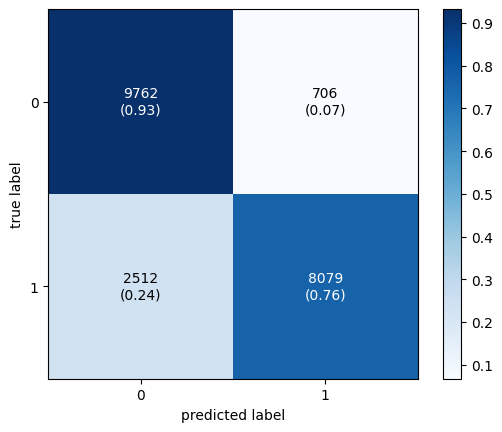

In [ ]:
# Créer une matrice de confusion pour la régression logistique
cm1 = confusion_matrix(Y_test,Y_pred_logistic)
plot_confusion_matrix(conf_mat=cm1,show_absolute=True,
                                show_normed=True,
                                colorbar=True)
plt.show()

# SVM

In [ ]:
# Créer et entraîner le modèle SVM
svm_model = SVC(random_state=42)
svm_model.fit(X_train, Y_train)

# Faire des prédictions sur l'ensemble de test
Y_pred_svm = svm_model.predict(X_test)

# Calculer l'accuracy
accuracy_svm = accuracy_score(Y_test, Y_pred_svm)
print(f'Accuracy (SVM): {accuracy_svm}')

#check MSE & RMSE
mse =mean_squared_error(Y_test, Y_pred)
print('Mean Squared Error : '+ str(mse))
rmse = math.sqrt(mean_squared_error(Y_test, Y_pred))
print('Root Mean Squared Error : '+ str(rmse))

# Afficher le rapport de classification
print('Classification Report (SVM):\n', classification_report(Y_test, Y_pred_svm))


# Calculer la matrice de confusion
conf_matrix_svm = confusion_matrix(Y_test, Y_pred_svm)


Accuracy (SVM): 0.8602972600788261
Mean Squared Error : 0.19155705399116768
Root Mean Squared Error : 0.437672313484835
Classification Report (SVM):
               precision    recall  f1-score   support

           0       0.80      0.96      0.87     10468
           1       0.95      0.76      0.85     10591

    accuracy                           0.86     21059
   macro avg       0.88      0.86      0.86     21059
weighted avg       0.88      0.86      0.86     21059



In [ ]:
#Calculer la matrice de confusion
conf_matrix_logistic = confusion_matrix(Y_test, Y_pred_svm)
conf_matrix_logistic

array([[10078,   390],
       [ 2552,  8039]])

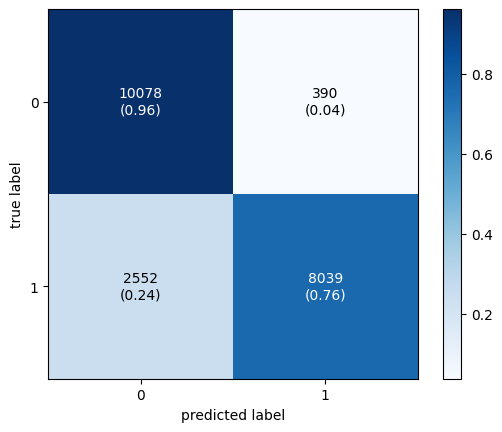

In [ ]:
# calculating and plotting the confusion matrix
cm1 = confusion_matrix(Y_test,Y_pred_svm)
plot_confusion_matrix(conf_mat=cm1,show_absolute=True,
                                show_normed=True,
                                colorbar=True)
plt.show()

In [ ]:
import xgboost as xgb

# Initialiser le modèle XGBoost
xgboost_model = xgb.XGBClassifier(n_estimators=100, random_state=42)

# Entraîner le modèle sur l'ensemble d'entraînement
xgboost_model.fit(X_train, Y_train)

# Faire des prédictions sur l'ensemble de test
Y_pred_xgboost = xgboost_model.predict(X_test)

# Évaluer les performances
accuracy_xgboost = accuracy_score(Y_test, Y_pred_xgboost)
print(f'Accuracy (XGBoost): {accuracy_xgboost}')


Accuracy (XGBoost): 0.758108172277886


### TEST

In [ ]:
# Créer un DataFrame avec des valeurs pour un patient diabétique
diabetic_patient_data = pd.DataFrame({
    'HighBP': [1.0],
    'HighChol': [1.0],
    'BMI': [40.0],
    'Smoker': [1.0],
    'Stroke': [0.0],
    'HeartDiseaseorAttack': [0.0],
    'PhysActivity': [0.0],
    'Veggies': [0.0],
    'HvyAlcoholConsump': [1.0],
    'GenHlth': [15.0],
    'MentHlth': [10.0],
    'PhysHlth': [3.0],
    'DiffWalk': [1.0],
    'Age': [6.0],
    'Education': [2.0],
    'Income': [2.0]
})

# Utiliser le modèle de régression logistique optimisé pour faire des prédictions
predicted_diabetes = logistic_model.predict(diabetic_patient_data)

# Afficher la prédiction
print(f"La prédiction pour ce patient est : {predicted_diabetes}")

La prédiction pour ce patient est : [1]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(
